# Pré instalações no terminal:

In [83]:
"""

Ambiente virtual no linux:

$: source venv/bin/activate

Instalações necessarias:

$: pip install pandas 
$: pip install numpy
$: pip install matplotlib 
$: pip install seaborn 
$: pip install scikit-learn

"""

'\n\nAmbiente virtual no linux:\n\n$: source venv/bin/activate\n\nInstalações necessarias:\n\n$: pip install pandas \n$: pip install numpy\n$: pip install matplotlib \n$: pip install seaborn \n$: pip install scikit-learn\n\n'

In [84]:
# Importação das bibliotecas:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, f1_score, r2_score
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor


# Classificação - Dataset Iris

In [85]:
# Carregamento dos dados:

df_iris = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/iris/iris.data",
                      header=None)

df_iris.columns = ["sepal_length","sepal_width","petal_length","petal_width","target"]
df_iris.head()


,sepal_length,sepal_width,petal_length,petal_width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   target        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


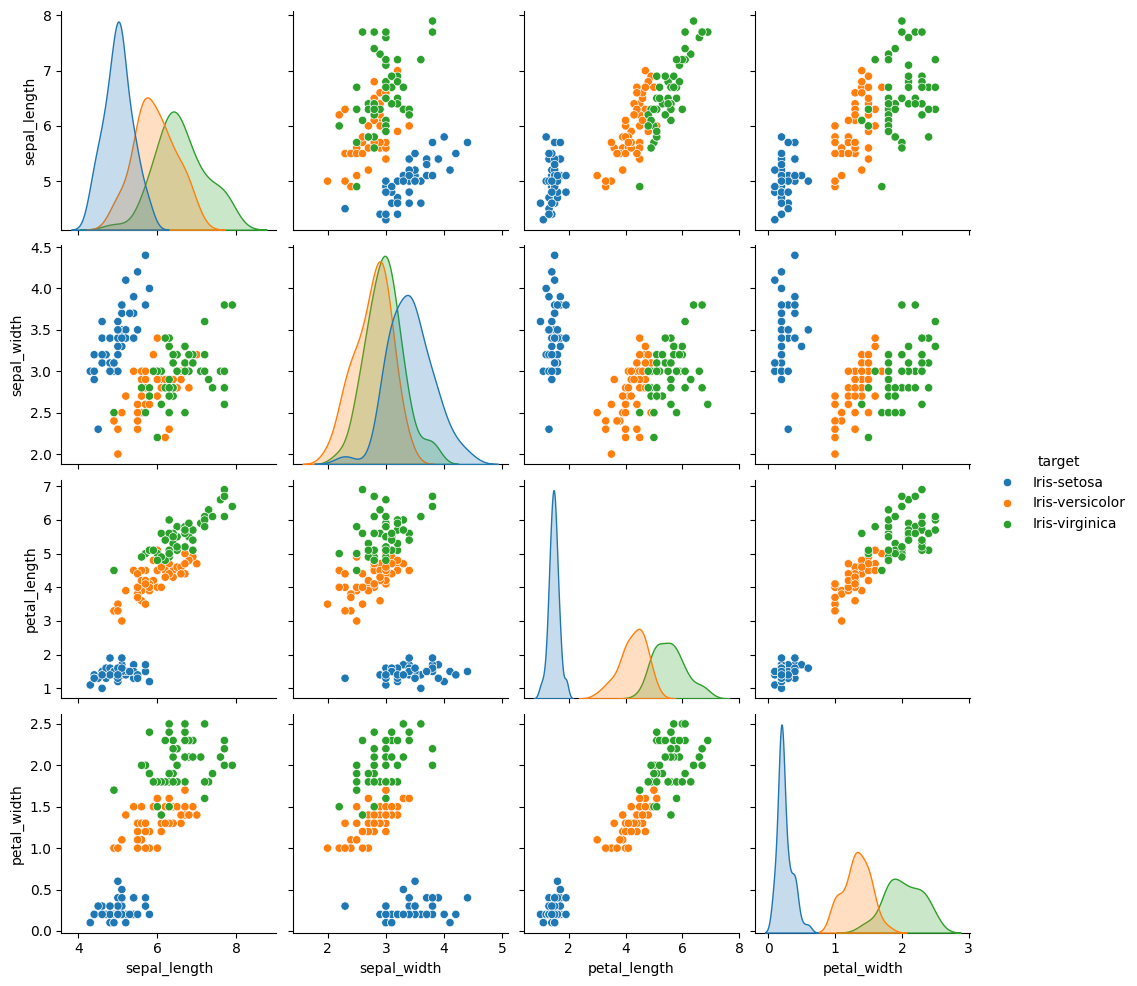

In [86]:
# Analise exploratoria:

df_iris.info()

sns.pairplot(df_iris, hue="target")
plt.show()


In [87]:
df_iris.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [88]:
# Separando Atributos e alvos:

X = df_iris.drop("target", axis=1)
y = df_iris["target"]


In [89]:
# treino e teste:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


In [90]:
# Excalonamento:

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


## Treinando os modelos de classificação:

In [91]:
# KNN:

knn = KNeighborsClassifier()
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)


In [92]:
# Desicion Tree

tree = DecisionTreeClassifier(random_state=42)
tree.fit(X_train, y_train)
y_pred_tree = tree.predict(X_test)


In [93]:
# Randow Forest

rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
y_pred_rf = rf.predict(X_test)


In [94]:
# Avaliação dos modelos de classificação

def avaliar_classificacao(y_test, y_pred):
    return {
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, average="macro"),
        "F1": f1_score(y_test, y_pred, average="macro")
    }

result_class = pd.DataFrame({
    "kNN": avaliar_classificacao(y_test, y_pred_knn),
    "Decision Tree": avaliar_classificacao(y_test, y_pred_tree),
    "Random Forest": avaliar_classificacao(y_test, y_pred_rf)
})
result_class


,kNN,Decision Tree,Random Forest
Accuracy,1.0,1.0,1.0
Precision,1.0,1.0,1.0
F1,1.0,1.0,1.0


# Regressão - Dataset Servo

In [95]:
# Carregando dados:

df_servo = pd.read_csv("https://archive.ics.uci.edu/ml/machine-learning-databases/servo/servo.data",
                       header=None)

df_servo.columns = ["motor","screw","pgain","vgain","class"]
df_servo.head()


,motor,screw,pgain,vgain,class
0,E,E,5,4,0.281251
1,B,D,6,5,0.506252
2,D,D,4,3,0.356251
3,B,A,3,2,5.500033
4,D,B,6,5,0.356251


In [96]:
df_servo.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   motor   167 non-null    object 
 1   screw   167 non-null    object 
 2   pgain   167 non-null    int64  
 3   vgain   167 non-null    int64  
 4   class   167 non-null    float64
dtypes: float64(1), int64(2), object(2)
memory usage: 6.7+ KB


In [97]:
df_servo.describe()

,pgain,vgain,class
count,167.000000,167.000000,167.000000
mean,4.155689,2.538922,1.389708
std,1.017770,1.369850,1.559635
min,3.000000,1.000000,0.131250
25%,3.000000,1.000000,0.503126
50%,4.000000,2.000000,0.731254
75%,5.000000,4.000000,1.259369
max,6.000000,5.000000,7.100108


In [98]:
# Tratando variaveis categoricas:

df_servo = pd.get_dummies(df_servo)


In [99]:
# Separando atributos e alvos:


X = df_servo.drop("class", axis=1)
y = df_servo["class"]

In [100]:
# Treino e teste:

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


## Treinando modelos de regressão:

In [101]:
# KNN:

knn_r = KNeighborsRegressor()
knn_r.fit(X_train, y_train)
y_pred_knn_r = knn_r.predict(X_test)


In [102]:
# Desicion Tree:

tree_r = DecisionTreeRegressor(random_state=42)
tree_r.fit(X_train, y_train)
y_pred_tree_r = tree_r.predict(X_test)


In [103]:
# Randow Forest:

rf_r = RandomForestRegressor(random_state=42)
rf_r.fit(X_train, y_train)
y_pred_rf_r = rf_r.predict(X_test)


In [104]:
# Avaliação da regressão:

result_reg = pd.DataFrame({
    "kNN": [r2_score(y_test, y_pred_knn_r)],
    "Decision Tree": [r2_score(y_test, y_pred_tree_r)],
    "Random Forest": [r2_score(y_test, y_pred_rf_r)],
}, index=["R2 Score"])

result_reg


,kNN,Decision Tree,Random Forest
R2 Score,0.688308,0.779227,0.882224
